In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

In [5]:
category = pd.DataFrame(data=category, columns=["category"])
df = pd.concat([df,category],axis=1)
df.drop(columns="quality",axis=1,inplace=True)

In [6]:
le=LabelEncoder()
df['category']=le.fit_transform(df['category'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [10]:
data=df.drop('category',axis=1)

scale=StandardScaler()
z=scale.fit_transform(data)
data=pd.DataFrame(data=z,columns=data.columns)
data['quality']=df['category']
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,2
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,2
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,2
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,2


# 1. Use feautes fixed acidity and volatile acidity

In [25]:
X=data.drop(['citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'],axis=1)
y=data['quality']

In [26]:
cluster_range=range(1,20)
cluster_error=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(X)
    cluster_error.append(clusters.inertia_)
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})
cluster_df[0:10]

,num_clusters,cluster_error
0,1,3198.000000
1,2,1855.116562
2,3,1237.886499
3,4,976.945210
4,5,810.914978
5,6,683.457880
6,7,598.547803
7,8,534.864976
8,9,479.883575
9,10,440.235688


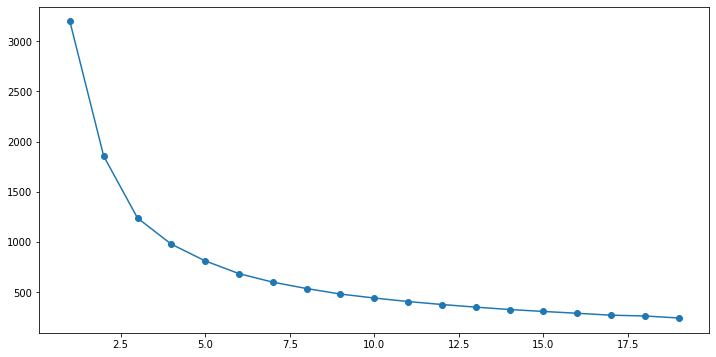

In [27]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_error,marker='o')

In [28]:
kmeans=KMeans(n_clusters=7).fit(X)
centroids=kmeans.cluster_centers_
print('centroids: \n',centroids)

label=kmeans.labels_
print()
print('Labels: ',label)

centroids: 
 [[-0.06278291 -1.15255438]
 [ 0.4369465   0.34724883]
 [ 2.41011261 -0.40925078]
 [-0.31724247  2.0973502 ]
 [-0.68152169  0.62762811]
 [ 1.14329185 -0.93145924]
 [-0.83195567 -0.43474247]]

Labels:  [4 3 4 ... 6 4 6]


In [29]:
print('confusion matrix: \n',confusion_matrix(y,label))
print('accuracy: \n',accuracy_score(y,label))

confusion matrix: 
 [[  3  10   4  24  14   2   6]
 [ 66  10  23   6  26  56  30]
 [153 222  76  96 377 140 255]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]
accuracy: 
 0.05565978736710444


# 2. Use feautes Cirtic acidity and fixed acidity

In [30]:
X=data.drop(['volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'],axis=1)
y=data['quality']

In [31]:
cluster_range=range(1,20)
cluster_error=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(X)
    cluster_error.append(clusters.inertia_)
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})
cluster_df[0:10]

,num_clusters,cluster_error
0,1,3198.000000
1,2,1349.582779
2,3,861.704601
3,4,680.668631
4,5,558.158222
5,6,465.074499
6,7,399.431950
7,8,363.715250
8,9,332.493246
9,10,304.928601


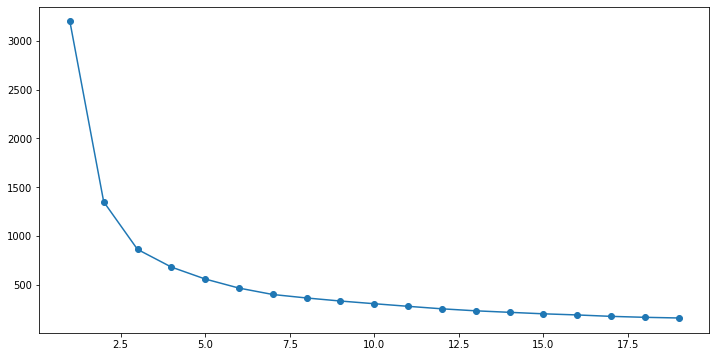

In [32]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_error,marker='o')

In [33]:
kmeans=KMeans(n_clusters=7).fit(X)
centroids=kmeans.cluster_centers_
print('centroids: \n',centroids)

label=kmeans.labels_
print()
print('Labels: ',label)

centroids: 
 [[-0.40524594 -1.11371296]
 [ 1.12417868  1.08947444]
 [ 0.48038882 -0.05094137]
 [-0.08373531  1.03894762]
 [ 2.35446129  1.58367352]
 [-1.16359045 -1.08136014]
 [-0.54547689 -0.03984935]]

Labels:  [0 0 0 ... 5 5 3]


In [34]:
print('confusion matrix: \n',confusion_matrix(y,label))
print('accuracy: \n',accuracy_score(y,label))

confusion matrix: 
 [[ 21   6   6   4   3  17   6]
 [ 19  53  17  46  26  25  31]
 [268 148 176 153  84 188 302]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]
accuracy: 
 0.15634771732332708


# 3. Use feautes residual suger and sulphades

In [35]:
X=data.drop(['fixed acidity','volatile acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','alcohol','quality'],axis=1)
y=data['quality']

In [36]:
cluster_range=range(1,20)
cluster_error=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(X)
    cluster_error.append(clusters.inertia_)
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})
cluster_df[0:10]

,num_clusters,cluster_error
0,1,3198.000000
1,2,2177.114997
2,3,1312.577756
3,4,998.162582
4,5,739.695142
5,6,622.349393
6,7,528.956208
7,8,434.882478
8,9,387.000221
9,10,347.619164


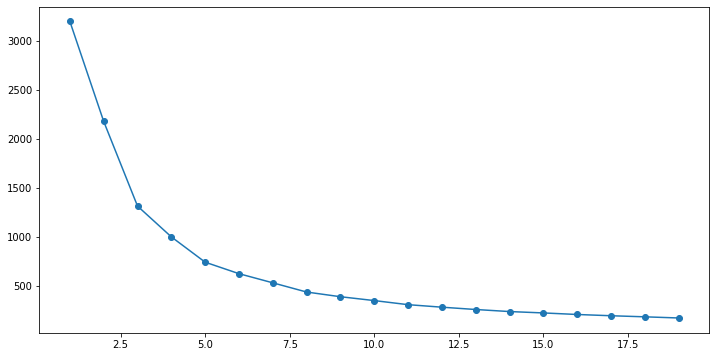

In [37]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_error,marker='o')

In [38]:
kmeans=KMeans(n_clusters=8).fit(X)
centroids=kmeans.cluster_centers_
print('centroids: \n',centroids)

label=kmeans.labels_
print()
print('Labels: ',label)

centroids: 
 [[-0.24868739  0.89475706]
 [-0.2284847  -0.10458839]
 [ 2.88946942  0.14442924]
 [-0.32668553 -0.80027323]
 [-0.31132282  6.63514213]
 [ 7.667079   -0.03199435]
 [-0.11067359  2.6222529 ]
 [ 1.09296595 -0.36017722]]

Labels:  [3 1 1 ... 0 1 7]


In [39]:
print('confusion matrix: \n',confusion_matrix(y,label))
print('accuracy: \n',accuracy_score(y,label))

confusion matrix: 
 [[  2  12   2  33   1   1   2  10]
 [ 98  58  19  17   0   0  11  14]
 [203 470  40 458   7  10  51  80]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
accuracy: 
 0.06253908692933083


# 4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide

In [40]:
X=data.drop(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','density','pH','sulphates','alcohol','quality'],axis=1)
y=data['quality']

In [41]:
cluster_range=range(1,20)
cluster_error=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(X)
    cluster_error.append(clusters.inertia_)
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})
cluster_df[0:10]

,num_clusters,cluster_error
0,1,3198.000000
1,2,1363.149246
2,3,975.656525
3,4,740.618493
4,5,560.595512
5,6,462.891218
6,7,398.928886
7,8,354.873620
8,9,320.218633
9,10,279.037556


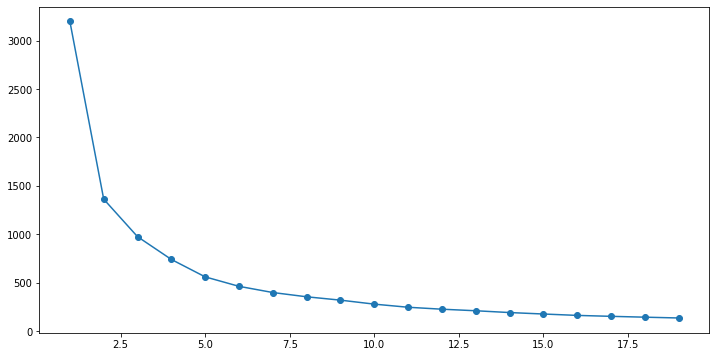

In [42]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_error,marker='o')

In [43]:
kmeans=KMeans(n_clusters=7).fit(X)
centroids=kmeans.cluster_centers_
print('centroids: \n',centroids)

label=kmeans.labels_
print()
print('Labels: ',label)

centroids: 
 [[-0.19303902 -0.24531947]
 [-0.89559006 -0.84505899]
 [ 1.22875579  2.74209817]
 [ 0.08009824  1.31578712]
 [ 0.81666999  0.16136218]
 [ 1.71282283  0.83795002]
 [ 3.49223819  1.64197759]]

Labels:  [0 4 0 ... 4 4 0]


In [44]:
print('confusion matrix: \n',confusion_matrix(y,label))
print('accuracy: \n',accuracy_score(y,label))

confusion matrix: 
 [[ 17  31   1   5   5   4   0]
 [ 51 109   2   8  31  13   3]
 [374 419  64 147 181 109  25]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]
accuracy: 
 0.11882426516572858


# 5. Use feautes fixed acidity, citric acidity and volatile acidity

In [45]:
X=data.drop(['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'],axis=1)
y=data['quality']

In [46]:
cluster_range=range(1,20)
cluster_error=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(X)
    cluster_error.append(clusters.inertia_)
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})
cluster_df[0:10]

,num_clusters,cluster_error
0,1,4797.000000
1,2,2494.147640
2,3,1857.130504
3,4,1534.085402
4,5,1297.582734
5,6,1136.020230
6,7,1033.451151
7,8,961.466045
8,9,893.464174
9,10,829.019212


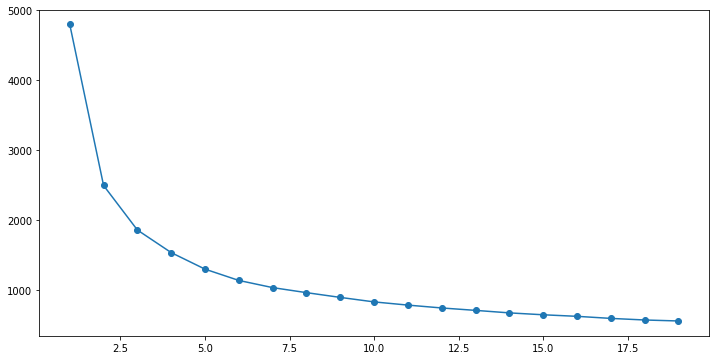

In [47]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_error,marker='o')

In [48]:
kmeans=KMeans(n_clusters=7).fit(X)
centroids=kmeans.cluster_centers_
print('centroids: \n',centroids)

label=kmeans.labels_
print()
print('Labels: ',label)

centroids: 
 [[-0.57627172 -0.42970053 -0.10270545]
 [-0.16751932 -1.185354    0.81109576]
 [-0.49293023  2.06893011 -0.95713295]
 [ 2.26830633 -0.47146004  1.60093449]
 [-0.77995954  0.44755649 -1.0932923 ]
 [ 0.27997974  0.68328151 -0.03582008]
 [ 0.96155716 -0.76007258  1.03645524]]

Labels:  [4 2 2 ... 4 4 1]


In [49]:
print('confusion matrix: \n',confusion_matrix(y,label))
print('accuracy: \n',accuracy_score(y,label))

confusion matrix: 
 [[  5   2  27   5  14   6   4]
 [ 20  65   6  30  35   4  57]
 [252 129  87  89 363 222 177]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]
accuracy: 
 0.09818636647904941


# 6. Use feautes density and pH

In [50]:
X=data.drop(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol','quality'],axis=1)
y=data['quality']

In [51]:
cluster_range=range(1,20)
cluster_error=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(X)
    cluster_error.append(clusters.inertia_)
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})
cluster_df[0:10]

,num_clusters,cluster_error
0,1,3198.000000
1,2,1934.100367
2,3,1516.807637
3,4,1165.608989
4,5,966.919408
5,6,825.484252
6,7,714.477507
7,8,630.766061
8,9,567.483296
9,10,521.377159


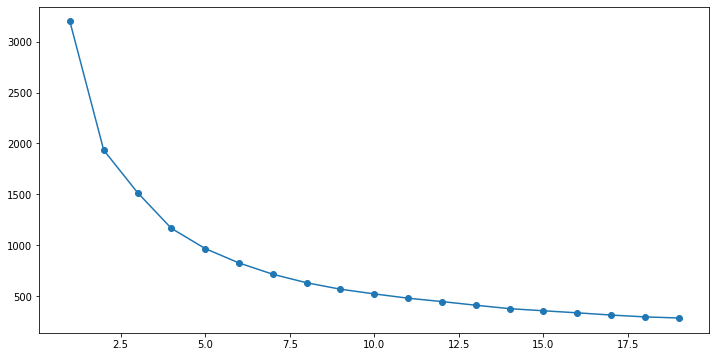

In [52]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_error,marker='o')

In [53]:
kmeans=KMeans(n_clusters=8).fit(X)
centroids=kmeans.cluster_centers_
print('centroids: \n',centroids)

label=kmeans.labels_
print()
print('Labels: ',label)

centroids: 
 [[-0.50249073  0.39350856]
 [ 1.87537784 -0.93181042]
 [ 0.62243995 -0.05867931]
 [-0.27191787 -0.64099037]
 [-1.53631887  1.8050795 ]
 [ 0.37205415  1.22708977]
 [-1.6069031  -0.20275849]
 [ 0.49384682 -1.51974548]]

Labels:  [5 3 3 ... 0 4 0]


In [54]:
print('confusion matrix: \n',confusion_matrix(y,label))
print('accuracy: \n',accuracy_score(y,label))

confusion matrix: 
 [[ 13   3  16   6   9  10   2   4]
 [ 43  19  29  39  21   4  42  20]
 [296 115 237 216  72 186  67 130]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
accuracy: 
 0.16823014383989993
